In [87]:
#Dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# Create a reference the CSV file desired
csv_path = "FARS2016NationalCSV/accident.csv"

# Read the CSV into a Pandas DataFrame
accidents = pd.read_csv(csv_path)


In [89]:
accidents_df = accidents.drop(accidents.columns[[2,4,5,6,7,8,17,18,19,20,24,25,26,27,30,31,32,33,39,40,41,42,43,44,45,46]], axis=1)

In [90]:
csv_path1 = "FARS2016NationalCSV/states.csv"
states = pd.read_csv(csv_path1)

In [91]:
accidents_df['STATE'] = accidents_df['STATE'].map(states.set_index('Codes')['State'])

In [92]:
xls_path = "GLC.xlsx"
xl = pd.ExcelFile(xls_path)
state_codes = xl.parse("Sheet 1")
state_codes.head()

,Territory,State Name,State Abbreviation,State Code,City Name/County Name,City Code,County Code
0,U,ALABAMA,AL,1.0,ABBEVILLE,10.0,67.0
1,U,ALABAMA,AL,1.0,ALBERTVILLE,50.0,95.0
2,U,ALABAMA,AL,1.0,ALEXANDER CITY,60.0,123.0
3,U,ALABAMA,AL,1.0,ANDALUSIA,90.0,39.0
4,U,ALABAMA,AL,1.0,ANDERSON,96.0,77.0


In [75]:
state_codes.fillna(0, inplace=True)

In [76]:
state_codes["City Code"]= state_codes["City Code"].astype(int)
state_codes["County Code"]= state_codes["County Code"].astype(int)
state_codes["State Name"] = state_codes["State Name"].astype(str) 

In [77]:
state_codes = state_codes.apply(lambda x: x.astype(str).str.title())

In [78]:
state_codes["state_county_city"] = state_codes["State Name"].map(str) + "_" + state_codes["County Code"].map(str) + "_" + state_codes["City Code"].map(str)

In [79]:
accidents_df["state_county_city"] = accidents_df["STATE"].map(str) + "_" + accidents_df["COUNTY"].map(str) + "_" + accidents_df["CITY"].map(str)

In [80]:
state_codes.loc[state_codes.duplicated('state_county_city', keep=False)]

,Territory,State Name,State Abbreviation,State Code,City Name/County Name,City Code,County Code,state_county_city
1048,U,Alaska,Ak,2.0,Denali,0,68,Alaska_68_0
1049,U,Alaska,Ak,2.0,Denali Borough,0,68,Alaska_68_0
46087,0,0,0,0.0,0,0,0,0_0_0
46088,For Official Use Only.,0,0,0.0,0,0,0,0_0_0


In [81]:
state_codes = state_codes.drop(state_codes.index[[1049,46088]])


In [82]:
accidents_df['CITY'] = accidents_df['state_county_city'].map(state_codes.set_index('state_county_city')['City Name/County Name'])

In [83]:
accidents_df.head()

,STATE,ST_CASE,VE_FORMS,PERMVIT,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,...,LGT_COND,WEATHER1,WEATHER2,WEATHER,CF1,CF2,CF3,FATALS,DRUNK_DR,state_county_city
0,Alabama,10001,1,1,73,Hoover,1,1,2016,6,...,1,1,0,1,0,0,0,1,1,Alabama_73_1716
1,Alabama,10002,1,2,73,Hoover,10,1,2016,1,...,3,1,0,1,0,0,0,1,1,Alabama_73_1716
2,Alabama,10003,1,1,73,Jefferson,1,1,2016,6,...,3,10,0,10,0,0,0,1,0,Alabama_73_0
3,Alabama,10004,1,1,73,Jefferson,17,1,2016,1,...,3,1,0,1,0,0,0,1,1,Alabama_73_0
4,Alabama,10005,1,1,73,Vestavia Hills,26,1,2016,3,...,3,2,0,2,0,0,0,1,0,Alabama_73_3125


In [84]:
csv_path2 = "FARS2016NationalCSV/weather.csv"
csv_path3 = "FARS2016NationalCSV/CF.csv"
csv_path4 = "FARS2016NationalCSV/light.csv"
csv_path5 = "FARS2016NationalCSV/road.csv"
csv_path6 = "FARS2016NationalCSV/Route.csv"
csv_path7 = "FARS2016NationalCSV/Man_Coll.csv"
csv_path8 = "FARS2016NationalCSV/Harm_Ev.csv"

csv_path_p1 = "FARS2016NationalCSV/personType.csv"
personType = pd.read_csv(csv_path_p1)

weather = pd.read_csv(csv_path2)
cf = pd.read_csv(csv_path3)
light_cond = pd.read_csv(csv_path4)
road = pd.read_csv(csv_path5)
route = pd.read_csv(csv_path6)
man_coll = pd.read_csv(csv_path7)
harm_ev = pd.read_csv(csv_path8)

In [85]:
accidents_df['WEATHER'] = accidents_df['WEATHER'].map(weather.set_index('Code')['Weather'])
accidents_df['WEATHER1'] = accidents_df['WEATHER1'].map(weather.set_index('Code')['Weather'])
accidents_df['WEATHER2'] = accidents_df['WEATHER2'].map(weather.set_index('Code')['Weather'])
accidents_df['CF1'] = accidents_df['CF1'].map(cf.set_index('Code')['Attribute'])
accidents_df['CF2'] = accidents_df['CF2'].map(cf.set_index('Code')['Attribute'])
accidents_df['CF3'] = accidents_df['CF3'].map(cf.set_index('Code')['Attribute'])
accidents_df['LGT_COND'] = accidents_df['LGT_COND'].map(light_cond.set_index('Code')['Attribute'])
accidents_df['REL_ROAD'] = accidents_df['REL_ROAD'].map(road.set_index('Code')['Attribute'])
accidents_df['MAN_COLL'] = accidents_df['MAN_COLL'].map(man_coll.set_index('Code')['Attribute'])
accidents_df['HARM_EV'] = accidents_df['HARM_EV'].map(harm_ev.set_index('Code')['Attribute'])
accidents_df['ROUTE'] = accidents_df['ROUTE'].map(route.set_index('Code')['Attribute'])



In [86]:

accidents_df

,STATE,ST_CASE,VE_FORMS,PERMVIT,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,...,LGT_COND,WEATHER1,WEATHER2,WEATHER,CF1,CF2,CF3,FATALS,DRUNK_DR,state_county_city
0,Alabama,10001,1,1,73,Hoover,1,1,2016,6,...,Daylight,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_1716
1,Alabama,10002,1,2,73,Hoover,10,1,2016,1,...,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_1716
2,Alabama,10003,1,1,73,Jefferson,1,1,2016,6,...,Dark - Lighted,Cloudy,No Additional Atmospheric Conditions,Cloudy,None,None,None,1,0,Alabama_73_0
3,Alabama,10004,1,1,73,Jefferson,17,1,2016,1,...,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_0
4,Alabama,10005,1,1,73,Vestavia Hills,26,1,2016,3,...,Dark - Lighted,Rain,No Additional Atmospheric Conditions,Rain,None,None,None,1,0,Alabama_73_3125
5,Alabama,10006,1,1,109,Pike,1,1,2016,6,...,Dark - Not Lighted,Cloudy,No Additional Atmospheric Conditions,Cloudy,None,None,None,1,0,Alabama_109_0
6,Alabama,10007,1,1,117,Calera,1,1,2016,6,...,Dark - Not Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,0,Alabama_117_530
7,Alabama,10008,1,1,83,Limestone,4,1,2016,2,...,Dark - Not Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_83_0
8,Alabama,10009,2,4,103,Priceville,4,1,2016,2,...,Dark - Not Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,2,0,Alabama_103_2545
9,Alabama,10010,1,2,69,Houston,5,1,2016,3,...,Daylight,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,2,1,Alabama_69_0


In [19]:
#accidents_df


In [20]:
accidents_df.columns

Index(['STATE', 'ST_CASE', 'VE_FORMS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'ROUTE', 'TWAY_ID', 'TWAY_ID2',
       'HARM_EV', 'MAN_COLL', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'CF1', 'CF2', 'CF3', 'FATALS', 'DRUNK_DR',
       'state_county_city'],
      dtype='object')

In [21]:
# # create a dictionary of values with their corresponding description for the column MAN_COLL
# #man_col_dict = {0 : "Not a Collision with a Motor Vehicle In-Transport",
#             1 : "Front-to-Rear", 
#             2 : "Front-to-Front",
#             6:"Angle",
#             7:"Sideswipe-Same Direction",
#             8: "Sideswipe-Opposite Direction",
#             9: "Rear-to-Side",
#             10: "Rear-to-Rear",
#             11: "Other",
#             98: "Not Reported",
#             99: "Unknown"          
#           }

# # replace the numbers in MAN_COLL column with the corresponding description from the dictionary
# accidents_df['MAN_COLL'] = [man_col_dict[val] for val in accidents_df['MAN_COLL']]

In [22]:
# # create a dictionary of values with their corresponding description for the column HARM_EV

# harm_ev_dict = {1 : "Rollover/Overturn",
#                 2 : "Fire/Explosion",
#                 3: "Immersion or Partial Immersion",
#                 4: "Gas Inhalation",
#                 51: "Jackknife (harmful to this vehicle)",
#                 6: "Injured in Vehicle (Non-Collision)",
#                 44: "Pavement Surface Irregularity (Ruts, Potholes, Grates, etc.)",
#                 7: "Other Non-Collision",
#                 16: "Thrown or Falling Object",
#                 72: "Cargo/Equipment Loss or Shift (harmful to this vehicle)",
#                 5: "Fell/Jumped from Vehicle",
#                 12: "Motor Vehicle In-Transport",
#                 54: "Motor Vehicle In-Transport Strikes",
#                 55: "Motor Vehicle in Motion Outside the Trafficway",
#                 8: "Pedestrian",
#                 9: "Pedalcyclist",
#                 10: "Railway Vehicle",
#                 74: "Road Vehicle on Rails",
#                 11: "Live Animal",
#                 49: "Ridden Animal",
#                 18: "Other Object (Not Fixed)",
#                 15: "Non-Motorist on Personal Conveyance",
#                 14: "Parked Motor Vehicle",
#                 45: "Working Motor Vehicle",
#                 73: "Object That Had Fallenfrom Motor Vehicle In-Transport",
#                 17: "Boulder",
#                 19: "Building",
#                 58: "Ground",
#                 20: "Impact Attenuator/Crash Cushion",
#                 50: "Bridge Overhead Structure",
#                 21: "Bridge Pier or Support",
#                 23: "Bridge Rail",
#                 24: "Guardrail Face",
#                 52: "Guardrail End",
#                 25: "Concrete Traffic Barrier",
#                 57: "Cable Barrier",
#                 26: "Other Traffic Barrier",
#                 59: "Traffic Sign Support",
#                 46: "Traffic Signal Support",
#                 30: "Utility Pole/Light Support",
#                 31: "Other Post, Other Pole, or Other Supports",
#                 32: "Culvert",
#                 33: "Curb",
#                 34: "Ditch",
#                 35: "Embankment",
#                 38: "Fence",
#                 39: "Wall",
#                 40: "Fire Hydrant",
#                 41: "Shrubbery",
#                 42: "Tree",
#                 48: "Snow Bank",
#                 53: "Mail Box",
#                 43: "Other Fixed Object",
#                 98: "Not Reported",
#                 99: "Unknown" 
#                }
# # replace the numbers in HARM_EV column with the corresponding description from the dictionary
# accidents_df['HARM_EV'] = [harm_ev_dict[val] for val in accidents_df['HARM_EV']]

In [23]:
# # create a dictionary of values with their corresponding description for the column ROUTE
# route_dict = {  1: "Interstate",
#                 2: "U.S. Highway",
#                 3: "State Highway",
#                 4: "County Road",
#                 5: "Local Street - Township",
#                 6: "Local Street - Municipality",
#                 7: "Local Street - Frontage Road",
#                 8: "Other",
#                 9: "Unknown"
#             }
# # replace the numbers in ROUTE column with the corresponding description from the dictionary
# accidents_df['ROUTE'] = [route_dict[val] for val in accidents_df['ROUTE']]

In [24]:
# visualize the data frame
accidents_df

,STATE,ST_CASE,VE_FORMS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,...,LGT_COND,WEATHER1,WEATHER2,WEATHER,CF1,CF2,CF3,FATALS,DRUNK_DR,state_county_city
0,Alabama,10001,1,73,Hoover,1,1,2016,6,9,...,Daylight,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_1716
1,Alabama,10002,1,73,Hoover,10,1,2016,1,19,...,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_1716
2,Alabama,10003,1,73,Jefferson,1,1,2016,6,2,...,Dark - Lighted,Cloudy,No Additional Atmospheric Conditions,Cloudy,None,None,None,1,0,Alabama_73_0
3,Alabama,10004,1,73,Jefferson,17,1,2016,1,21,...,Dark - Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_73_0
4,Alabama,10005,1,73,Vestavia Hills,26,1,2016,3,20,...,Dark - Lighted,Rain,No Additional Atmospheric Conditions,Rain,None,None,None,1,0,Alabama_73_3125
5,Alabama,10006,1,109,Pike,1,1,2016,6,1,...,Dark - Not Lighted,Cloudy,No Additional Atmospheric Conditions,Cloudy,None,None,None,1,0,Alabama_109_0
6,Alabama,10007,1,117,Calera,1,1,2016,6,23,...,Dark - Not Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,0,Alabama_117_530
7,Alabama,10008,1,83,Limestone,4,1,2016,2,17,...,Dark - Not Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,1,1,Alabama_83_0
8,Alabama,10009,2,103,Priceville,4,1,2016,2,5,...,Dark - Not Lighted,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,2,0,Alabama_103_2545
9,Alabama,10010,1,69,Houston,5,1,2016,3,15,...,Daylight,Clear,No Additional Atmospheric Conditions,Clear,None,None,None,2,1,Alabama_69_0


In [25]:
accidents_df.to_csv("accidents-final.csv")

In [26]:
# accidents_grp = accidents_df.groupby(['STATE', 'HARM_EV']).count()
# accidents_grp.reset_index(inplace=True)
# accidents_grp

In [27]:
#accidents_grp.sort_values('ST_CASE', ascending=False)

In [28]:
# df = accidents_grp.pivot(index='HARM_EV', columns='STATE', values='ST_CASE')
# df.fillna(0, inplace=True)
# df

In [29]:
accidents_df['HARM_EV'].value_counts()

Motor Vehicle In-Transport                                                                                                               13097
Pedestrian                                                                                                                                5548
Rollover/Overturn                                                                                                                         3067
Tree (Standing Only)                                                                                                                      2538
Curb                                                                                                                                      1077
Ditch                                                                                                                                      963
Embankment                                                                                                                                 947

In [30]:
# get the data from accidents.csv for the year 2015 to analyze the most harmful events for the year 2015
csv_path_2015 = "DA-prj-1/FARS2015NationalCSV/accident_2015.csv"
accident_2015 = pd.read_csv(csv_path_2015)
# drop all columns other than ST_CASE and HARM_EV
accident_2015 = accident_2015.drop(accident_2015.columns[[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]], axis=1)
accident_2015['HARM_EV'] = accident_2015['HARM_EV'].map(harm_ev.set_index('Code')['Attribute'])
accident_2015 = accident_2015.rename(columns={'HARM_EV': 'HARM_EV_2015'})
accident_2015.head()

,ST_CASE,HARM_EV_2015
0,10001,Embankment
1,10002,Ditch
2,10003,Tree (Standing Only)
3,10004,Mail Box
4,10005,Motor Vehicle In-Transport


In [31]:
# get most harmful event's totals for the year 2016
total_accdnt_2016 = accidents_df['ST_CASE'].count()
vehicle_accdnt_2016 = accidents_df[accidents_df['HARM_EV'] == "Motor Vehicle In-Transport"]
vehicle_accdnt_count_2016 = vehicle_accdnt_2016["ST_CASE"].count()
pedestrian_accdnt_2016 = accidents_df[accidents_df['HARM_EV'] == "Pedestrian"]
pedestrian_accdnt_count_2016 = pedestrian_accdnt_2016["ST_CASE"].count()
rollover_accdnt_2016 = accidents_df[accidents_df['HARM_EV'] == "Rollover/Overturn"]
rollover_accdnt_count_2016 = rollover_accdnt_2016["ST_CASE"].count()
cyclist_accdnt_2016 = accidents_df[accidents_df['HARM_EV'] == "Pedalcyclist"]
cyclist_accdnt_count_2016 = cyclist_accdnt_2016["ST_CASE"].count()
other_accdnt_2016 = accidents_df.loc[~accidents_df['HARM_EV'].isin(['Motor Vehicle In-Transport', 'Pedestrian', 'Rollover/Overturn', 'Pedalcyclist'])]
other_accdnt_count_2016 = other_accdnt_2016["ST_CASE"].count()

In [32]:
# get most harmful events totals for the year 2015
total_accdnt_2015 = accident_2015['ST_CASE'].count()
vehicle_accdnt_2015 = accident_2015[accident_2015['HARM_EV_2015'] == "Motor Vehicle In-Transport"]
vehicle_accdnt_count_2015 = vehicle_accdnt_2015["ST_CASE"].count()
pedestrian_accdnt_2015 = accident_2015[accident_2015['HARM_EV_2015'] == "Pedestrian"]
pedestrian_accdnt_count_2015 = pedestrian_accdnt_2015["ST_CASE"].count()
rollover_accdnt_2015 = accident_2015[accident_2015['HARM_EV_2015'] == "Rollover/Overturn"]
rollover_accdnt_count_2015 = rollover_accdnt_2015["ST_CASE"].count()
cyclist_accdnt_2015 = accident_2015[accident_2015['HARM_EV_2015'] == "Pedalcyclist"]
cyclist_accdnt_count_2015 = cyclist_accdnt_2015["ST_CASE"].count()
other_accdnt_2015 = accident_2015.loc[~accident_2015['HARM_EV_2015'].isin(['Motor Vehicle In-Transport', 'Pedestrian', 'Rollover/Overturn', 'Pedalcyclist'])]
other_accdnt_count_2015 = other_accdnt_2015["ST_CASE"].count()

In [33]:
# create a data frame for the 2016 metrics
metrics_df_2016 = pd.DataFrame({
                            '% Accidents involving Motor Vehicle': vehicle_accdnt_count_2016/total_accdnt_2016 *100,
                            '% Accidents involving Pedestrian': pedestrian_accdnt_count_2016/total_accdnt_2016 *100,
                            '% Accidents involving Rollover/Overturn':rollover_accdnt_count_2016/total_accdnt_2016 *100,
                            '% Accidents involving Pedalcyclist':[cyclist_accdnt_count_2016/total_accdnt_2016 *100],
                            '% All Other Accidents' : other_accdnt_count_2016/total_accdnt_2016 * 100
                           })

# create a data frame for the 2015 metrics
metrics_df_2015 = pd.DataFrame({                 
                            '% Accidents involving Motor Vehicle': vehicle_accdnt_count_2015/total_accdnt_2015 * 100,
                            '% Accidents involving Pedestrian': pedestrian_accdnt_count_2015/total_accdnt_2015 * 100,
                            '% Accidents involving Rollover/Overturn':rollover_accdnt_count_2015/total_accdnt_2015 * 100,
                            '% Accidents involving Pedalcyclist':[cyclist_accdnt_count_2015/total_accdnt_2015 * 100],
                            '% All Other Accidents' : other_accdnt_count_2015/total_accdnt_2015 * 100
                           })


metrics_df_2015 = metrics_df_2015.round(2)
metrics_df_2016 = metrics_df_2016.round(2)

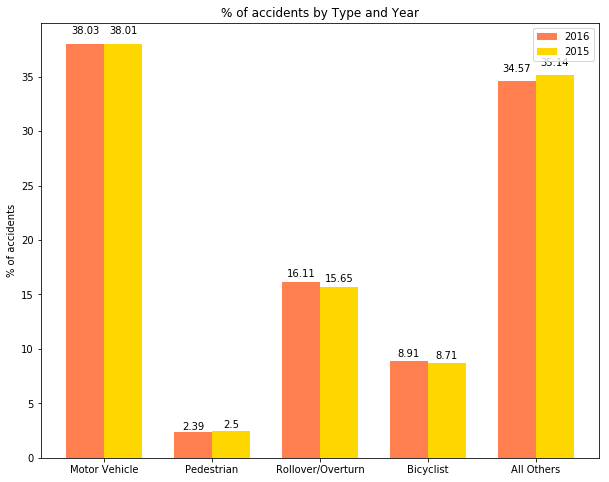

In [34]:
# set x labels and y values
x_labels = ["Motor Vehicle", "Pedestrian", "Rollover/Overturn", "Bicyclist", "All Others"]
y_vals_2016 = metrics_df_2016.iloc[0]
y_vals_2015 = metrics_df_2015.iloc[0]

x_vals = np.arange(len(x_labels))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects_2016 = ax.bar(x_vals, y_vals_2016, width, color='coral')
rects_2015 = ax.bar(x_vals+width, y_vals_2015, width, color='gold')

# add some text for labels, title and axes ticks
ax.set_ylabel('% of accidents')
ax.set_title('% of accidents by Type and Year')
ax.set_xticks(x_vals + width / 2)
ax.set_xticklabels(x_labels)

ax.legend((rects_2016[0], rects_2015[0]), ('2016', '2015'))

def autolabel(rects):
    #Attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%s' % str(height), ha='center', va='bottom')

autolabel(rects_2016)
autolabel(rects_2015)
plt.savefig("%_of_accidents_by_Type_and_Year")
plt.show()


In [35]:
# Analyzing Persons.csv file

In [36]:
csv_path_per1 = "FARS2016NationalCSV/person.csv"
persons_2016 = pd.read_csv(csv_path_per1)
persons_2016.head()

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,73,1,1,9,...,9999,999,99,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,73,10,1,19,...,8888,999,99,0,0,0,8,0,0,0
2,1,10002,1,1,2,0,73,10,1,19,...,1959,0,0,0,0,0,0,6,1,0
3,1,10003,1,1,1,0,73,1,1,2,...,220,0,0,0,0,0,0,7,1,0
4,1,10003,1,2,1,0,73,1,1,2,...,8888,999,99,0,0,0,8,0,0,0


In [37]:
persons_2016.columns

Index(['STATE', 'ST_CASE', 'VE_FORMS', 'VEH_NO', 'PER_NO', 'STR_VEH', 'COUNTY',
       'DAY', 'MONTH', 'HOUR', 'MINUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV',
       'MAN_COLL', 'SCH_BUS', 'MAKE', 'MAK_MOD', 'BODY_TYP', 'MOD_YEAR',
       'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER', 'IMPACT1', 'FIRE_EXP',
       'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE', 'REST_MIS',
       'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT', 'DRINKING', 'ALC_DET',
       'ALC_STATUS', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DRUG_DET', 'DSTATUS',
       'DRUGTST1', 'DRUGTST2', 'DRUGTST3', 'DRUGRES1', 'DRUGRES2', 'DRUGRES3',
       'HOSPITAL', 'DOA', 'DEATH_DA', 'DEATH_MO', 'DEATH_YR', 'DEATH_HR',
       'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS', 'P_SF1', 'P_SF2',
       'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'],
      dtype='object')

In [38]:
csv_path_per2 = "FARS2016NationalCSV/Inj_Sev.csv"
injury_severity = pd.read_csv(csv_path_per2)
persons_2016['INJ_SEV'] = persons_2016['INJ_SEV'].map(injury_severity.set_index('Code')['Attribute'])
persons_2016['INJ_SEV'].value_counts()

Fatal Injury                 37461
No Apparent Injury           20753
Suspected Minor Injury        9749
Suspected Serious Injury      8530
Possible Injury               7355
Unknown/Not Reported          1394
Injured, Severity Unknown      251
Died Prior to Crash              3
Name: INJ_SEV, dtype: int64

In [39]:
# inj_sev_dict = {
#     0: "No Apparent Injury",
#     1: "Possible Injury",
#     2: "Suspected Minor Injury",
#     3: "Suspected Serious Injury",
#     4: "Fatal Injury",
#     5: "Injured, Severity Unknown",
#     6: "Died Prior to Crash",
#     9:"Unknown/Not Reported"
# }

In [40]:

# persons_2016['INJ_SEV'] = [inj_sev_dict[val] for val in persons_2016['INJ_SEV']]
# persons_2016['INJ_SEV'].value_counts()

In [41]:
#persons_2016['SEX'].value_counts()

In [42]:
# persons_by_sex = persons_2016.groupby('SEX').count()
# persons_by_sex

In [43]:
# persons_driving = persons_2016.loc[persons_2016['PER_NO'] == 1]
# persons_by_sex = persons_driving.groupby('SEX').count()
# persons_by_sex

In [44]:
# Establish the bins 
age_bins = [0, 9.90, 19.90, 29.90, 39.90, 49.90, 59.90, 69.90, 999]
group_names = ["Below 10", "10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 -59", "60 - 70", "70 and Above"]

# Categorize the existing players using the age bins
persons_2016["Age Ranges"] = pd.cut(persons_2016["AGE"], age_bins, labels=group_names)

# Calculate the Numbers by Age Group
age_demographics_totals = persons_2016["Age Ranges"].value_counts()
age_demographics_totals

25 - 44         27422
45 - 64         21226
18-24           14218
65 and Above    12843
5 -17            7702
Below 5          1725
Name: Age Ranges, dtype: int64

In [45]:
# get the records where the severity of injury is of type 4
inj_sev_4 = persons_2016.loc[persons_2016['INJ_SEV'] == "Fatal Injury"]
# Get counts by age group
inj_sev_4_count = inj_sev_4.groupby(["Age Ranges"]).count()['INJ_SEV']
inj_sev_4_count



Age Ranges
Below 5           322
5 -17            1927
18-24            5901
25 - 44         11876
45 - 64         10480
65 and Above     6883
Name: INJ_SEV, dtype: int64

In [46]:
# get the records where the severity of injury is of type 3
inj_sev_3 = persons_2016.loc[persons_2016['INJ_SEV'] == "Suspected Serious Injury"]
# Get counts by age group
inj_sev_3_count = inj_sev_3.groupby(["Age Ranges"]).count()['INJ_SEV']
inj_sev_3_count

Age Ranges
Below 5          206
5 -17           1124
18-24           1762
25 - 44         2758
45 - 64         1735
65 and Above     912
Name: INJ_SEV, dtype: int64

In [47]:
# get the records where the severity of injury is of type 2
inj_sev_2 = persons_2016.loc[persons_2016['INJ_SEV'] == "Suspected Minor Injury"]
# Get counts by age group
inj_sev_2_count = inj_sev_2.groupby(["Age Ranges"]).count()['INJ_SEV']
inj_sev_2_count

Age Ranges
Below 5          305
5 -17           1504
18-24           1936
25 - 44         3055
45 - 64         2026
65 and Above     884
Name: INJ_SEV, dtype: int64

In [48]:
# get the records where the severity of injury is of type 1
inj_sev_1 = persons_2016.loc[persons_2016['INJ_SEV'] == "Possible Injury"]
# Get counts by age group
inj_sev_1_count = inj_sev_1.groupby(["Age Ranges"]).count()['INJ_SEV']
inj_sev_1_count

Age Ranges
Below 5          287
5 -17           1066
18-24           1298
25 - 44         2336
45 - 64         1563
65 and Above     733
Name: INJ_SEV, dtype: int64

In [49]:
# get the records where the severity of injury is of type 0
inj_sev_0 = persons_2016.loc[persons_2016['INJ_SEV'] == "No Apparent Injury"]
# Get counts by age group
inj_sev_0_count = inj_sev_0.groupby(["Age Ranges"]).count()['INJ_SEV']
inj_sev_0_count

Age Ranges
Below 5          588
5 -17           2017
18-24           3143
25 - 44         7073
45 - 64         5186
65 and Above    2606
Name: INJ_SEV, dtype: int64

In [96]:
# create a data frame with these counts
age_demographics = pd.DataFrame({"Total Injured": age_demographics_totals,
                                "Fatal Injury": inj_sev_4_count,
                                 "Suspected Serious Injury": inj_sev_3_count,
                                 "Suspected Minor Injury": inj_sev_2_count,
                                 "Possible Injury": inj_sev_1_count,
                                 "No Apparent Injury": inj_sev_0_count
                                })
age_demographics = age_demographics[["Fatal Injury", "Suspected Serious Injury", "Suspected Minor Injury", "Possible Injury", "No Apparent Injury", "Total Injured"]]
age_demographics


,Fatal Injury,Suspected Serious Injury,Suspected Minor Injury,Possible Injury,No Apparent Injury,Total Injured
18-24,5901,1762,1936,1298,3143,14218
25 - 44,11876,2758,3055,2336,7073,27422
45 - 64,10480,1735,2026,1563,5186,21226
5 -17,1927,1124,1504,1066,2017,7702
65 and Above,6883,912,884,733,2606,12843
Below 5,322,206,305,287,588,1725


In [97]:
age_demographics = age_demographics[["Fatal Injury", "Total Injured"]]
age_demographics

,Fatal Injury,Total Injured
18-24,5901,14218
25 - 44,11876,27422
45 - 64,10480,21226
5 -17,1927,7702
65 and Above,6883,12843
Below 5,322,1725


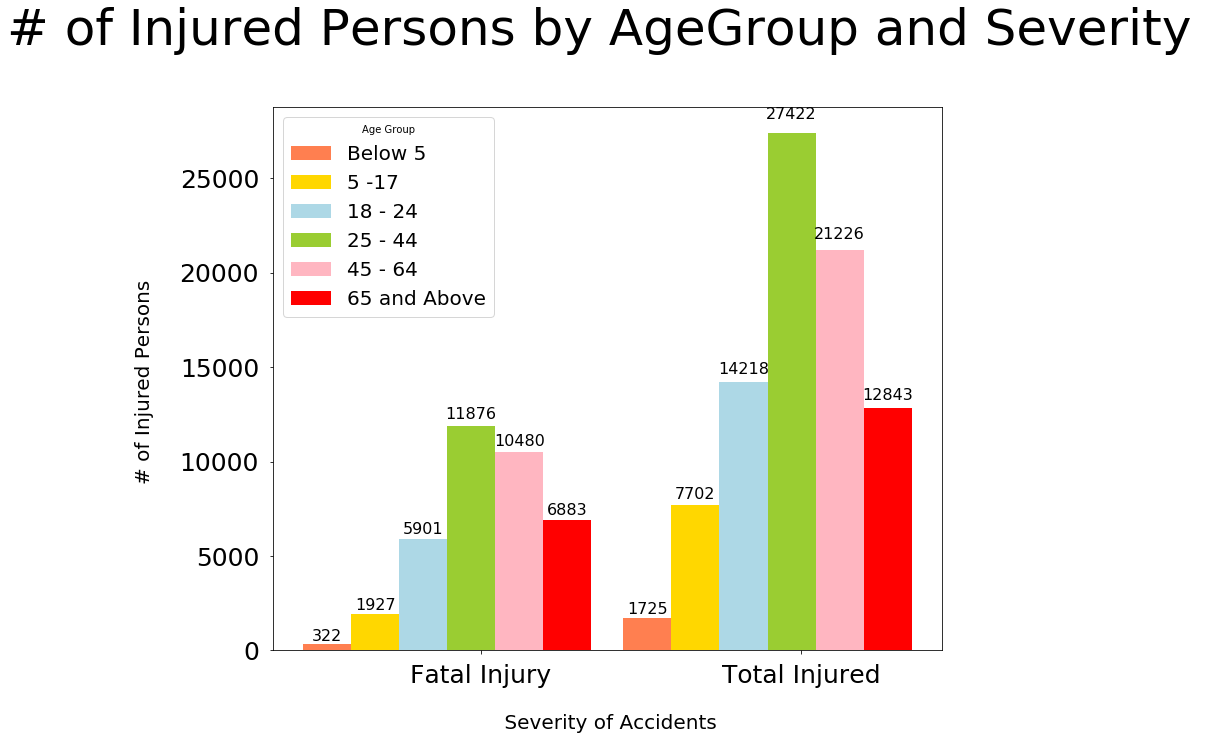

In [101]:
x_labels = age_demographics.columns
y_vals_below_5 = age_demographics.ix['Below 5'] 
y_vals_upto_17 = age_demographics.ix['5 -17'] 
y_vals_upto_24 = age_demographics.ix['18-24'] 
y_vals_upto_44 = age_demographics.ix['25 - 44'] 
y_vals_upto_64= age_demographics.ix['45 - 64'] 
y_vals_above_65= age_demographics.ix['65 and Above']

x_vals = np.arange(len(x_labels)) # the x locations for the groups 
width = 0.15 # the width of the bars
fig, ax = plt.subplots(figsize=(12, 10)) 
rects_5 = ax.bar(x_vals, y_vals_below_5, width, color='coral') 
rects_17 = ax.bar(x_vals+width, y_vals_upto_17, width, color='gold') 
rects_24 = ax.bar(x_vals+width+width, y_vals_upto_24, width, color='lightblue') 
rects_44 = ax.bar(x_vals+width+width+width, y_vals_upto_44, width, color='yellowgreen') 
rects_64 = ax.bar(x_vals+width+width+width+width, y_vals_upto_64, width, color='lightpink') 
rects_65 = ax.bar(x_vals+width+width+width+width+width, y_vals_above_65, width, color='red')
ax.set_ylabel('# of Injured Persons \n', fontsize=20) 
ax.set_xlabel("\n Severity of Accidents", fontsize=20)
ax.set_title('# of Injured Persons by AgeGroup and Severity \n', fontsize=50) 
ax.set_xticks(x_vals+width+ width+ width+ width/ 5) 
ax.set_xticklabels(x_labels)
ax.tick_params(labelsize = 25, pad =10)

ax.legend((rects_5[0], rects_17[0], rects_24[0], rects_44[0], rects_64[0], rects_65[0]), 
          ('Below 5', '5 -17', '18 - 24', '25 - 44', '45 - 64', '65 and Above'),
         fontsize=20).set_title("Age Group",prop={"size": 10})
def autolabel(rects): 
    """ Attach a text label above each bar displaying its height """ 
    for rect in rects: 
        height = rect.get_height() 
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height, '%s' % str(height), ha='center', va='bottom', fontsize=16)
        
autolabel(rects_5) 
autolabel(rects_17) 
autolabel(rects_24) 
autolabel(rects_44) 
autolabel(rects_64) 
autolabel(rects_65) 
plt.savefig("#_of_accidents_by_AgeGroup_and_Severity") 
plt.show()

In [56]:
csv_path_per3 = "FARS2016NationalCSV/personType.csv"
personType = pd.read_csv(csv_path_per3)
persons_2016['PER_TYP'] = persons_2016['PER_TYP'].map(personType.set_index('Code')['Attributes'])
persons_2016['PER_TYP'].value_counts()
#personType

Driver of a Motor Vehicle In-Transport                   51914
Passenger of a Motor Vehicle In-Transport                25537
Pedestrian                                                6398
Bicyclist                                                  865
Occupant of a Motor Vehicle Not In-Transport               354
Person on Personal Conveyances                             179
Unknown Occupant Type in a Motor Vehicle In-Transport      161
Persons In/On Buildings                                     44
Occupant of a Non-Motor Vehicle Transport Device            38
Other Cyclist                                                6
Name: PER_TYP, dtype: int64

In [64]:
fatal_inj_sex = persons_2016.loc[persons_2016['INJ_SEV'] == 'Fatal Injury']
fatal_inj_sex_df = pd.DataFrame(fatal_inj_sex.groupby(['PER_TYP', 'SEX']).count()['INJ_SEV'])
fatal_inj_sex_df
#fatal_inj_sex.groupby('PER_TYP').count()

INJ_SEV
PER_TYP                                            SEX         
Bicyclist                                          1        700
                                                   2        129
                                                   8          3
                                                   9          3
Driver of a Motor Vehicle In-Transport             1      18221
                                                   2       5325
                                                   8         10
                                                   9          4
Occupant of a Motor Vehicle Not In-Transport       1         34
                                                   2         20
Occupant of a Non-Motor Vehicle Transport Device   1         11
                                                   2          4
Other Cyclist                                      1          5
Passenger of a Motor Vehicle In-Transport          1       3168
                                                   2       3572
Pedestrian                                         1       4179
                                                   2       1783
                                                   8          5
                                                   9         20
Person on Personal Conveyances                     1        137
                                                   2         32
Persons In/On Buildings                            1          8
                                                   2          6
Unknown Occupant Type in a Motor Vehicle In-Tra... 1         52
                                                   2         29
                                                   9          1

In [66]:
fatal_inj_sex = persons_2016.loc[persons_2016['INJ_SEV'] == 'Fatal Injury']
fatal_inj_sex_df = pd.DataFrame(fatal_inj_sex.groupby(['PER_TYP', 'SEX'])['ST_CASE'].nunique())
fatal_inj_sex_df

ST_CASE
PER_TYP                                            SEX         
Bicyclist                                          1        699
                                                   2        126
                                                   8          3
                                                   9          3
Driver of a Motor Vehicle In-Transport             1      17967
                                                   2       5284
                                                   8         10
                                                   9          4
Occupant of a Motor Vehicle Not In-Transport       1         33
                                                   2         16
Occupant of a Non-Motor Vehicle Transport Device   1         11
                                                   2          3
Other Cyclist                                      1          5
Passenger of a Motor Vehicle In-Transport          1       2942
                                                   2       3338
Pedestrian                                         1       4150
                                                   2       1770
                                                   8          5
                                                   9         20
Person on Personal Conveyances                     1        136
                                                   2         32
Persons In/On Buildings                            1          8
                                                   2          6
Unknown Occupant Type in a Motor Vehicle In-Tra... 1         41
                                                   2         22
                                                   9          1